**<center> <span style="color:#0F52BA;font-family:serif; font-size:34px;"> TELECOM CUSTOMER CHURN PREDICTION </span> </center>**

<center><span style="font-family:Palatino; font-size:22px;"><i> Did you know that attracting a new customer costs <span style="color:#DC143C;">five times</span> as much as keeping an existing one?</i></span> </center>

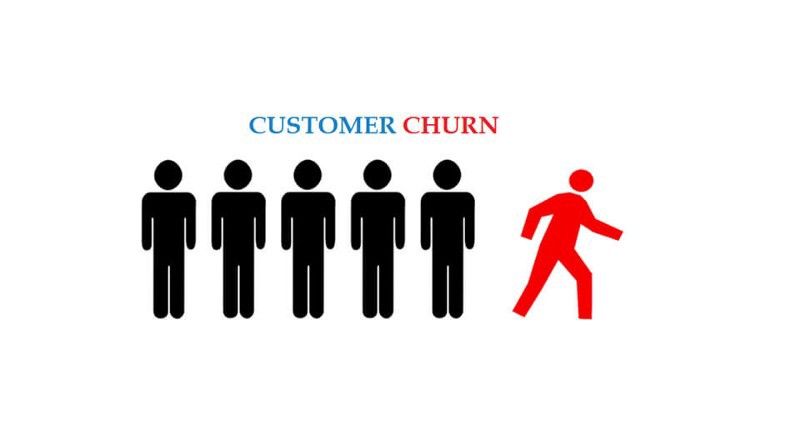

## What is Customer Churn?
Customer churn is defined as when customers or subscribers discontinue doing business with a firm or service.

Customers in the telecom industry can choose from a variety of service providers and actively switch from one to the next. The telecommunications business has an annual churn rate of 15-25 percent in this highly competitive market.

Individualized customer retention is tough because most firms have a large number of customers and can't afford to devote much time to each of them. The costs would be too great, outweighing the additional revenue. However, if a corporation could forecast which customers are likely to leave ahead of time, it could focus customer retention efforts only on these "high risk" clients. The ultimate goal is to expand its coverage area and retrieve more customers loyalty. The core to succeed in this market lies in the customer itself.

Customer churn is a critical metric because it is much less expensive to retain existing customers than it is to acquire new customers.


### To reduce customer churn, telecom companies need to predict which customers are at high risk of churn.

To detect early signs of potential churn, one must first develop a holistic view of the customers and their interactions across numerous channels, including store/branch visits, product purchase histories, customer service calls, Web-based transactions, and social media interactions, to mention a few.

As a result, by addressing churn, these businesses may not only preserve their market position, but also grow and thrive. More customers they have in their network, the lower the cost of initiation and the larger the profit. As a result, the company's key focus for success is reducing client attrition and implementing effective retention strategy.


#### Objectives
I will explore the data and try to answer some questions like:

What's the % of Churn Customers and customers that keep in with the active services?
Is there any patterns in Churn Customers based on the gender?
Is there any patterns/preference in Churn Customers based on the type of service provided?
What's the most profitable service types?
Which features and services are most profitable?
Many more questions that will arise during the analysis

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import accuracy_score
warnings.filterwarnings('ignore')
from sklearn.preprocessing import RobustScaler
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier
import plotly.express as px

In [2]:
df = pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv")

In [3]:
df.head()

customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV StreamingMovies        Contract PaperlessBilling  \
0          No          No              No  Month-to-month              Yes   
1          No          No              No        One year               No   
2          No          No              No  Month-to-month              Yes   
3         Yes          No              No        One year               No   
4          No          No              No  Month-to-month              Yes   

               PaymentMethod MonthlyCharges  TotalCharges Churn  
0           Electronic check          29.85         29.85    No  
1               Mailed check          56.95        1889.5    No  
2               Mailed check          53.85        108.15   Yes  
3  Bank transfer (automatic)          42.30       1840.75    No  
4           Electronic check          70.70        151.65   Yes  

[5 rows x 21 columns]

**The data set includes information about:**
* **Customers who left within the last month** – the column is called Churn

* **Services that each customer has signed up for** – phone, multiple lines, internet, online security, online backup, device protection, tech support, and streaming TV and movies

* **Customer account information** - how long they’ve been a customer, contract, payment method, paperless billing, monthly charges, and total charges

* **Demographic info about customers** – gender, age range, and if they have partners and dependents

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


### The target the we will use to guide the exploration is **Churn**

In [5]:
#Checking for the null values

df.isnull().sum()

#We don't have any null values in our dataset

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

## Data Manipulation

In [6]:
#Lets drop the customer ID column
df = df.drop(["customerID"], axis = "columns")

In [7]:
df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [8]:
# Total charges column is in object type.. lets convert it into int type

df["TotalCharges"] = pd.to_numeric(df.TotalCharges, errors='coerce')

In [9]:
df.isnull().sum()

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [10]:
df[np.isnan(df["TotalCharges"])]

gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
488   Female              0     Yes        Yes       0           No   
753     Male              0      No        Yes       0          Yes   
936   Female              0     Yes        Yes       0          Yes   
1082    Male              0     Yes        Yes       0          Yes   
1340  Female              0     Yes        Yes       0           No   
3331    Male              0     Yes        Yes       0          Yes   
3826    Male              0     Yes        Yes       0          Yes   
4380  Female              0     Yes        Yes       0          Yes   
5218    Male              0     Yes        Yes       0          Yes   
6670  Female              0     Yes        Yes       0          Yes   
6754    Male              0      No        Yes       0          Yes   

         MultipleLines InternetService       OnlineSecurity  \
488   No phone service             DSL                  Yes   
753                 No              No  No internet service   
936                 No             DSL                  Yes   
1082               Yes              No  No internet service   
1340  No phone service             DSL                  Yes   
3331                No              No  No internet service   
3826               Yes              No  No internet service   
4380                No              No  No internet service   
5218                No              No  No internet service   
6670               Yes             DSL                   No   
6754               Yes             DSL                  Yes   

             OnlineBackup     DeviceProtection          TechSupport  \
488                    No                  Yes                  Yes   
753   No internet service  No internet service  No internet service   
936                   Yes                  Yes                   No   
1082  No internet service  No internet service  No internet service   
1340                  Yes                  Yes                  Yes   
3331  No internet service  No internet service  No internet service   
3826  No internet service  No internet service  No internet service   
4380  No internet service  No internet service  No internet service   
5218  No internet service  No internet service  No internet service   
6670                  Yes                  Yes                  Yes   
6754                  Yes                   No                  Yes   

              StreamingTV      StreamingMovies  Contract PaperlessBilling  \
488                   Yes                   No  Two year              Yes   
753   No internet service  No internet service  Two year               No   
936                   Yes                  Yes  Two year               No   
1082  No internet service  No internet service  Two year               No   
1340                  Yes                   No  Two year               No   
3331  No internet service  No internet service  Two year               No   
3826  No internet service  No internet service  Two year               No   
4380  No internet service  No internet service  Two year               No   
5218  No internet service  No internet service  One year              Yes   
6670                  Yes                   No  Two year               No   
6754                   No                   No  Two year              Yes   

                  PaymentMethod  MonthlyCharges  TotalCharges Churn  
488   Bank transfer (automatic)           52.55           NaN    No  
753                Mailed check           20.25           NaN    No  
936                Mailed check           80.85           NaN    No  
1082               Mailed check           25.75           NaN    No  
1340    Credit card (automatic)           56.05           NaN    No  
3331               Mailed check           19.85           NaN    No  
3826               Mailed check           25.35           NaN    No  
4380               Mailed check           20.00           

* It can also be noted that the Tenure column is 0 for these entries even though the MonthlyCharges column is not empty.

Let's see if there are any other 0 values in the tenure column.

In [11]:
df[df["tenure"]==0].index

Int64Index([488, 753, 936, 1082, 1340, 3331, 3826, 4380, 5218, 6670, 6754], dtype='int64')

* There are no additional missing values in the Tenure column. 

Let's delete the rows with missing values in Tenure columns since there are only 11 rows and deleting them will not affect the data.

In [12]:
df.drop(df[df["tenure"]==0].index, axis ="rows", inplace = True )

In [13]:
df[df["tenure"]==0].index

#Rows have been deleted

Int64Index([], dtype='int64')

In [14]:
df["SeniorCitizen"] = df["SeniorCitizen"].map({0:"No", 1:"Yes"})

In [15]:
df["SeniorCitizen"].head()

0    No
1    No
2    No
3    No
4    No
Name: SeniorCitizen, dtype: object

In [16]:
df["InternetService"].describe()

count            7032
unique              3
top       Fiber optic
freq             3096
Name: InternetService, dtype: object

# <span style="font-family:serif; font-size:28px;">Data Visualization </span>

In [17]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go

In [18]:
g_labels = ['Male', 'Female']
c_labels = ['No', 'Yes']
# Create subplots: use 'domain' type for Pie subplot
fig = make_subplots(rows=1, cols=2, specs=[[{'type':'domain'}, {'type':'domain'}]])
fig.add_trace(go.Pie(labels=g_labels, values=df['gender'].value_counts(), name="Gender"),
              1, 1)
fig.add_trace(go.Pie(labels=c_labels, values=df['Churn'].value_counts(), name="Churn"),
              1, 2)

# Use `hole` to create a donut-like pie chart
fig.update_traces(hole=.4, hoverinfo="label+percent+name", textfont_size=16)

fig.update_layout(
    title_text="Gender and Churn Distributions",
    # Add annotations in the center of the donut pies.
    annotations=[dict(text='Gender', x=0.16, y=0.5, font_size=20, showarrow=False),
                 dict(text='Churn', x=0.84, y=0.5, font_size=20, showarrow=False)])
fig.show()

* 26.6 % of customers switched to another firm.
* Customers are 49.5 % female and 50.5 % male.

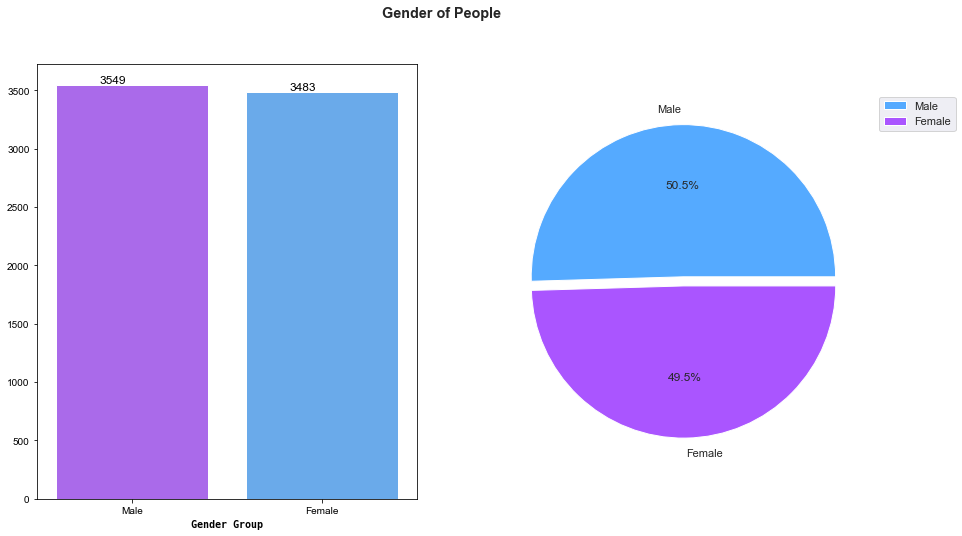

In [19]:
fig, ax = plt.subplots(1, 2, figsize=(15,8))
x=df['gender'].value_counts().index
y=df['gender'].value_counts().values.tolist()
data = df.groupby("gender").size()
sns.set(style="dark", color_codes=True)
pal = sns.color_palette("cool", len(data))
rank = data.argsort().argsort() 
sns.barplot(x=x,y=y,palette=np.array(pal[::-1])[rank],ax = ax[0])
for p in ax[0].patches:
        ax[0].annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.3, p.get_height()),
                    ha='center', va='bottom',
                    color= 'black')
ax[0].set_xlabel('Gender Group', weight='semibold', fontname = 'monospace')
        
ax[1].pie(y, labels = x, colors = pal, autopct='%1.1f%%',
        explode=[0.03 for i in df['gender'].value_counts().index])
plt.legend(bbox_to_anchor=(1, 1))
plt.suptitle ('Gender of People',weight = 'bold')
plt.show()

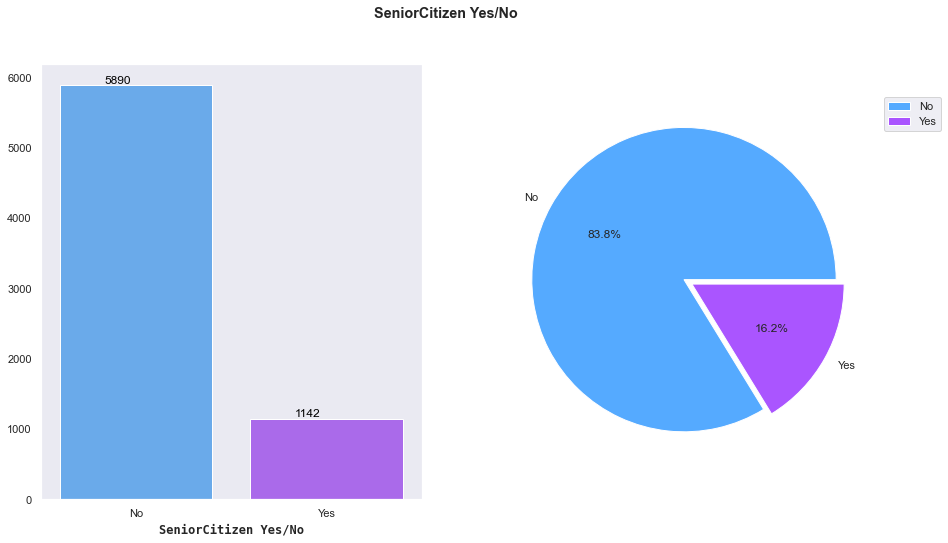

In [20]:
fig, ax = plt.subplots(1, 2, figsize=(15,8))
x=df['SeniorCitizen'].value_counts().index
y=df['SeniorCitizen'].value_counts().values.tolist()
data = df.groupby("SeniorCitizen").size()
sns.set(style="dark", color_codes=True)
pal = sns.color_palette("cool", len(data))
rank = data.argsort().argsort() 
sns.barplot(x=x,y=y,palette=np.array(pal[::-1])[rank],ax = ax[0])
for p in ax[0].patches:
        ax[0].annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.3, p.get_height()),
                    ha='center', va='bottom',
                    color= 'black')
ax[0].set_xlabel('SeniorCitizen Yes/No', weight='semibold', fontname = 'monospace')
        
ax[1].pie(y, labels = x, colors = pal, autopct='%1.1f%%',
        explode=[0.03 for i in df['SeniorCitizen'].value_counts().index])
plt.legend(bbox_to_anchor=(1, 1))
plt.suptitle ('SeniorCitizen Yes/No',weight = 'bold')
plt.show()

* Most of the customers are not SeniorCitizen.
* Number of customers without partners are 5901, 83.8% of the customers are not SeniorCitizen.
* Number of customers with partners are 1142, 16.2% of the customers are SeniorCitizen

In [21]:
df["Partner"].value_counts()

No     3639
Yes    3393
Name: Partner, dtype: int64

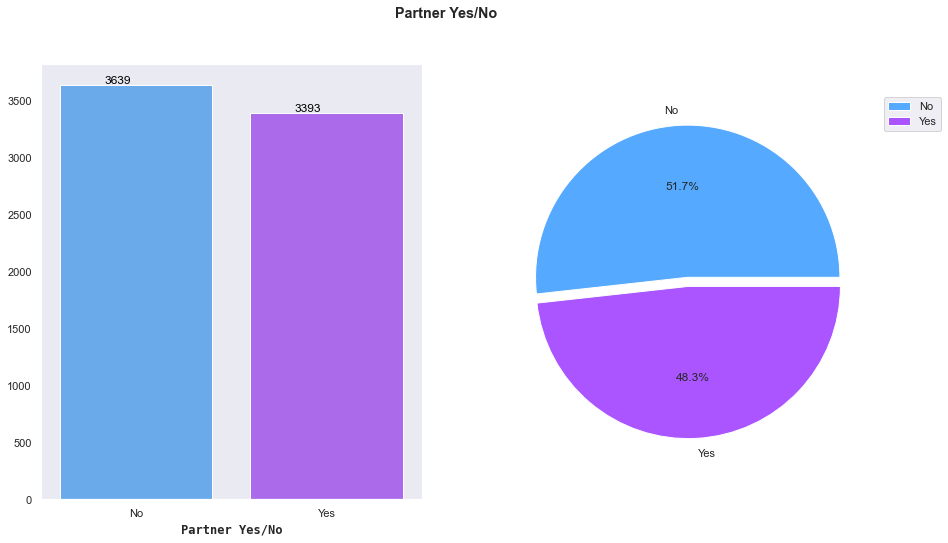

In [22]:
fig, ax = plt.subplots(1, 2, figsize=(15,8))
x=df['Partner'].value_counts().index
y=df['Partner'].value_counts().values.tolist()
data = df.groupby("Partner").size()
sns.set(style="dark", color_codes=True)
pal = sns.color_palette("cool", len(data))
rank = data.argsort().argsort() 
sns.barplot(x=x,y=y,palette=np.array(pal[::-1])[rank],ax = ax[0])
for p in ax[0].patches:
        ax[0].annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.3, p.get_height()),
                    ha='center', va='bottom',
                    color= 'black')
ax[0].set_xlabel('Partner Yes/No', weight='semibold', fontname = 'monospace')
        
ax[1].pie(y, labels = x, colors = pal, autopct='%1.1f%%',
        explode=[0.03 for i in df['Partner'].value_counts().index])
plt.legend(bbox_to_anchor=(1, 1))
plt.suptitle ('Partner Yes/No',weight = 'bold')
plt.show()

In [23]:
labels = df['PaymentMethod'].unique()
values = df['PaymentMethod'].value_counts()

fig = go.Figure(data=[go.Pie(labels=labels, values=values, hole=.3)])
fig.update_layout(title_text="<b>Payment Method Distribution</b>")
fig.show()

In [24]:
fig = px.histogram(df, x="Churn", color="PaymentMethod", title="<b>Customer Payment Method distribution w.r.t. Churn</b>")
fig.update_layout(width=700, height=500, bargap=0.1)
fig.show()

* Major customers who moved out were having Electronic Check as Payment Method.
* Customers who opted for Credit-Card automatic transfer or Bank Automatic Transfer and Mailed Check as Payment Method were less likely to move out.  

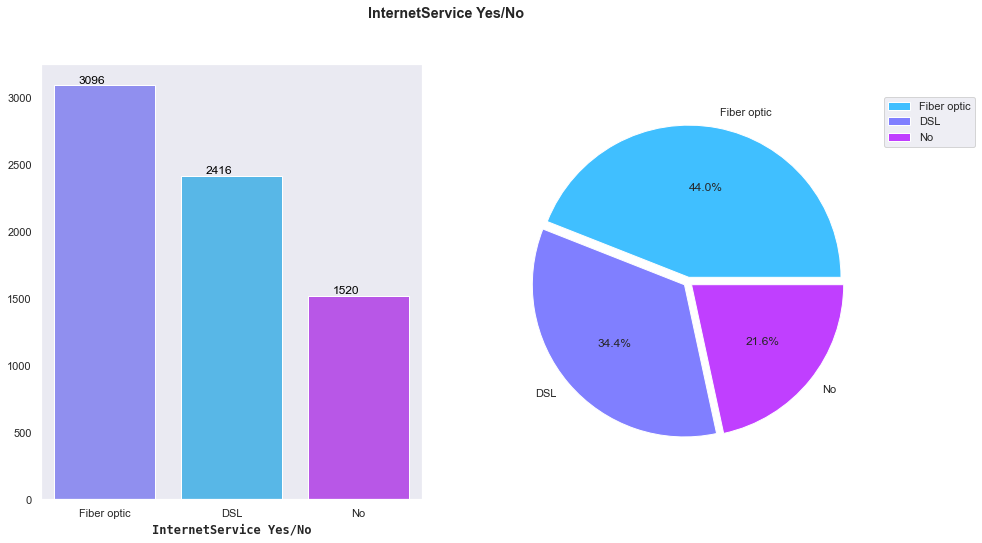

In [25]:
fig, ax = plt.subplots(1, 2, figsize=(15,8))
x=df['InternetService'].value_counts().index
y=df['InternetService'].value_counts().values.tolist()
data = df.groupby("InternetService").size()
sns.set(style="dark", color_codes=True)
pal = sns.color_palette("cool", len(data))
rank = data.argsort().argsort() 
sns.barplot(x=x,y=y,palette=np.array(pal[::-1])[rank],ax = ax[0])
for p in ax[0].patches:
        ax[0].annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.3, p.get_height()),
                    ha='center', va='bottom',
                    color= 'black')
ax[0].set_xlabel('InternetService Yes/No', weight='semibold', fontname = 'monospace')
        
ax[1].pie(y, labels = x, colors = pal, autopct='%1.1f%%',
        explode=[0.03 for i in df['InternetService'].value_counts().index])
plt.legend(bbox_to_anchor=(1, 1))
plt.suptitle ('InternetService Yes/No',weight = 'bold')
plt.show()

* Most of the customers are not having Fiber Optic InternetService
* 44% (3096) of the customers are having Fiber optic InternetService
* 34.4% (2421) of the customers are having DSL InternetService
* 21.7% (1526) of the customers are not having any InternetService service

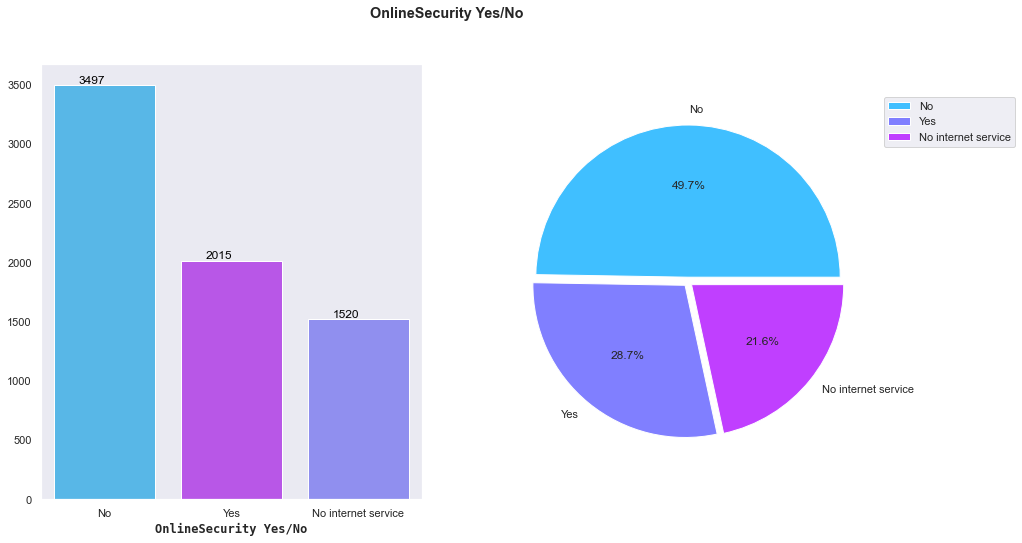

In [26]:
fig, ax = plt.subplots(1, 2, figsize=(15,8))
x=df['OnlineSecurity'].value_counts().index
y=df['OnlineSecurity'].value_counts().values.tolist()
data = df.groupby("OnlineSecurity").size()
sns.set(style="dark", color_codes=True)
pal = sns.color_palette("cool", len(data))
rank = data.argsort().argsort() 
sns.barplot(x=x,y=y,palette=np.array(pal[::-1])[rank],ax = ax[0])
for p in ax[0].patches:
        ax[0].annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.3, p.get_height()),
                    ha='center', va='bottom',
                    color= 'black')
ax[0].set_xlabel('OnlineSecurity Yes/No', weight='semibold', fontname = 'monospace')
        
ax[1].pie(y, labels = x, colors = pal, autopct='%1.1f%%',
        explode=[0.03 for i in df['InternetService'].value_counts().index])
plt.legend(bbox_to_anchor=(1, 1))
plt.suptitle ('OnlineSecurity Yes/No',weight = 'bold')
plt.show()

* Most of the customers are not having OnlineSecurity
* 49.7% (3498) of the customers are not having OnlineSecurity
* 28.7% (2019) of the customers are having OnlineSecurity
* 21.7% (1526) of the customers are not having any internet service

In [27]:
df["OnlineBackup"].value_counts()

No                     3087
Yes                    2425
No internet service    1520
Name: OnlineBackup, dtype: int64

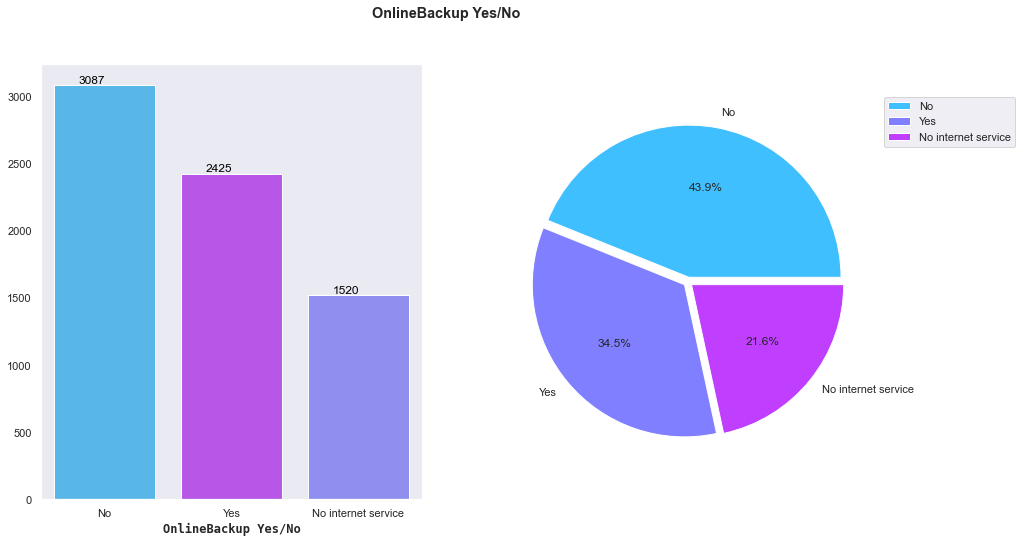

In [28]:
fig, ax = plt.subplots(1, 2, figsize=(15,8))
x=df['OnlineBackup'].value_counts().index
y=df['OnlineBackup'].value_counts().values.tolist()
data = df.groupby("OnlineBackup").size()
sns.set(style="dark", color_codes=True)
pal = sns.color_palette("cool", len(data))
rank = data.argsort().argsort() 
sns.barplot(x=x,y=y,palette=np.array(pal[::-1])[rank],ax = ax[0])
for p in ax[0].patches:
        ax[0].annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.3, p.get_height()),
                    ha='center', va='bottom',
                    color= 'black')
ax[0].set_xlabel('OnlineBackup Yes/No', weight='semibold', fontname = 'monospace')
        
ax[1].pie(y, labels = x, colors = pal, autopct='%1.1f%%',
        explode=[0.03 for i in df['InternetService'].value_counts().index])
plt.legend(bbox_to_anchor=(1, 1))
plt.suptitle ('OnlineBackup Yes/No',weight = 'bold')
plt.show()

# <span style="font-family:serif; font-size:28px;"> Exploring Numerial Columns </span>

<AxesSubplot:xlabel='tenure', ylabel='Count'>

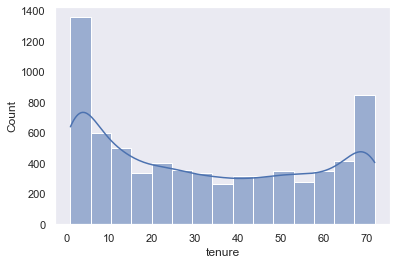

In [29]:
sns.histplot(x = df["tenure"], kde = True)

* Most of the customers are staying only in between 0-5 months in the company


<AxesSubplot:xlabel='MonthlyCharges', ylabel='Count'>

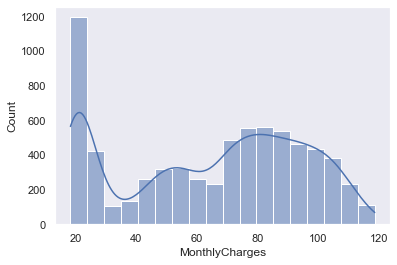

In [30]:
sns.histplot(x = df['MonthlyCharges'],kde = True)

* Most of the customers having Monthly charges in between 20-25

In [31]:
df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

# <span style="font-family:serif; font-size:28px;"> Checking outliers </span>

In [32]:
mean = np.mean(df.MonthlyCharges)
std = np.std(df.MonthlyCharges)
print('mean of the MonthlyCharges is', mean)
print('std. deviation is', std)

threshold = 3
outlier = []
for i in df.MonthlyCharges:
    z = (i-mean)/std
    if z > threshold:
        outlier.append(i)
print('outlier in dataset is', outlier)

mean of the MonthlyCharges is 64.79820819112632
std. deviation is 30.08383458914301
outlier in dataset is []


In [33]:
mean = np.mean(df.TotalCharges)
std = np.std(df.TotalCharges)
print('mean of the TotalCharges is', mean)
print('std. deviation is', std)

threshold = 3
outlier = []
for i in df.TotalCharges:
    z = (i-mean)/std
    if z > threshold:
        outlier.append(i)
print('outlier in dataset is', outlier)

mean of the TotalCharges is 2283.3004408418697
std. deviation is 2266.6101807145355
outlier in dataset is []


In [34]:
mean = np.mean(df.tenure)
std = np.std(df.tenure)
print('mean of the tenure is', mean)
print('std. deviation is', std)

threshold = 3
outlier = []
for i in df.tenure:
    z = (i-mean)/std
    if z > threshold:
        outlier.append(i)
print('outlier in dataset is', outlier)

mean of the tenure is 32.421786120591584
std. deviation is 24.543514392681953
outlier in dataset is []


In [35]:
# IQR method

x = ['tenure','MonthlyCharges']
def count_outliers(df,col):
        q1 = df[col].quantile(0.25,interpolation='nearest')
        q2 = df[col].quantile(0.5,interpolation='nearest')
        q3 = df[col].quantile(0.75,interpolation='nearest')
        q4 = df[col].quantile(1,interpolation='nearest')
        IQR = q3 -q1
        global LLP
        global ULP
        LLP = q1 - 1.5*IQR
        ULP = q3 + 1.5*IQR
        if df[col].min() > LLP and df[col].max() < ULP:
            print("No outliers in",i)
        else:
            print("There are outliers in",i)
            x = df[df[col]<LLP][col].size
            y = df[df[col]>ULP][col].size
            a.append(i)
            print('Count of outliers are:',x+y)
global a
a = []
for i in x:
    count_outliers(df,i)

No outliers in tenure
No outliers in MonthlyCharges


# <span style="font-family:serif; font-size:28px;"> One hot encoding </span>

In [36]:
df.head()

gender SeniorCitizen Partner Dependents  tenure PhoneService  \
0  Female            No     Yes         No       1           No   
1    Male            No      No         No      34          Yes   
2    Male            No      No         No       2          Yes   
3    Male            No      No         No      45           No   
4  Female            No      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity OnlineBackup  \
0  No phone service             DSL             No          Yes   
1                No             DSL            Yes           No   
2                No             DSL            Yes          Yes   
3  No phone service             DSL            Yes           No   
4                No     Fiber optic             No           No   

  DeviceProtection TechSupport StreamingTV StreamingMovies        Contract  \
0               No          No          No              No  Month-to-month   
1              Yes          No          No              No        One year   
2               No          No          No              No  Month-to-month   
3              Yes         Yes          No              No        One year   
4               No          No          No              No  Month-to-month   

  PaperlessBilling              PaymentMethod  MonthlyCharges  TotalCharges  \
0              Yes           Electronic check           29.85         29.85   
1               No               Mailed check           56.95       1889.50   
2              Yes               Mailed check           53.85        108.15   
3               No  Bank transfer (automatic)           42.30       1840.75   
4              Yes           Electronic check           70.70        151.65   

  Churn  
0    No  
1    No  
2   Yes  
3    No  
4   Yes

In [55]:
df['churn_rate'] = df['Churn'].replace("No", 0).replace("Yes", 1)

In [56]:
df.drop(["Churn"], axis = "columns", inplace = True)

In [57]:
df1 = pd.get_dummies(data=df, columns = ["SeniorCitizen",'gender', 'Partner', 'Dependents', 
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod'],drop_first=True)

In [58]:
df1.head()

tenure  MonthlyCharges  TotalCharges  churn_rate  SeniorCitizen_Yes  \
0       1           29.85         29.85           0                  0   
1      34           56.95       1889.50           0                  0   
2       2           53.85        108.15           1                  0   
3      45           42.30       1840.75           0                  0   
4       2           70.70        151.65           1                  0   

   gender_Male  Partner_Yes  Dependents_Yes  PhoneService_Yes  \
0            0            1               0                 0   
1            1            0               0                 1   
2            1            0               0                 1   
3            1            0               0                 0   
4            0            0               0                 1   

   MultipleLines_No phone service  ...  StreamingTV_No internet service  \
0                               1  ...                                0   
1                               0  ...                                0   
2                               0  ...                                0   
3                               1  ...                                0   
4                               0  ...                                0   

   StreamingTV_Yes  StreamingMovies_No internet service  StreamingMovies_Yes  \
0                0                                    0                    0   
1                0                                    0                    0   
2                0                                    0                    0   
3                0                                    0                    0   
4                0                                    0                    0   

   Contract_One year  Contract_Two year  PaperlessBilling_Yes  \
0                  0                  0                     1   
1                  1                  0                     0   
2                  0                  0                     1   
3                  1                  0                     0   
4                  0                  0                     1   

   PaymentMethod_Credit card (automatic)  PaymentMethod_Electronic check  \
0                                      0                               1   
1                                      0                               0   
2                                      0                               0   
3                                      0                               0   
4                                      0                               1   

   PaymentMethod_Mailed check  
0                           0  
1                           1  
2                           1  
3                           0  
4                           0  

[5 rows x 31 columns]

In [59]:
df1 = df1[['SeniorCitizen_Yes', 'tenure', 'MonthlyCharges', 'TotalCharges',
        'gender_Male', 'Partner_Yes', 'Dependents_Yes',
       'PhoneService_Yes', 'MultipleLines_No phone service',
       'MultipleLines_Yes', 'InternetService_Fiber optic',
       'InternetService_No', 'OnlineSecurity_No internet service',
       'OnlineSecurity_Yes', 'OnlineBackup_No internet service',
       'OnlineBackup_Yes', 'DeviceProtection_No internet service',
       'DeviceProtection_Yes', 'TechSupport_No internet service',
       'TechSupport_Yes', 'StreamingTV_No internet service', 'StreamingTV_Yes',
       'StreamingMovies_No internet service', 'StreamingMovies_Yes',
       'Contract_One year', 'Contract_Two year', 'PaperlessBilling_Yes',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check','churn_rate']]

# <span style="font-family:serif; font-size:28px;"> Feature Scaling </span>

<Figure size 1080x576 with 0 Axes>

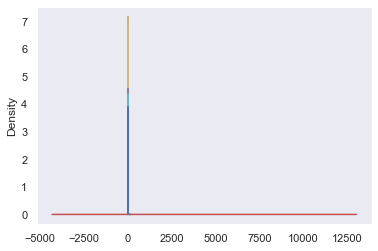

In [60]:
plt.figure(figsize=[15,8])
df1.plot.kde()
plt.legend([],[], frameon=False)

In [62]:
x = df1.drop(['churn_rate'], axis = 1)
y = df1['churn_rate']

In [63]:
x.shape

(7032, 30)

In [64]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=40)

In [65]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()  
df2=sc.fit_transform(x)
df_scaled = pd.DataFrame(df2 ,columns = df1.columns[:-1])

In [66]:
df_scaled.head()

SeniorCitizen_Yes    tenure  MonthlyCharges  TotalCharges  gender_Male  \
0          -0.440327 -1.280248       -1.161694     -0.994194    -1.009430   
1          -0.440327  0.064303       -0.260878     -0.173740     0.990658   
2          -0.440327 -1.239504       -0.363923     -0.959649     0.990658   
3          -0.440327  0.512486       -0.747850     -0.195248     0.990658   
4          -0.440327 -1.239504        0.196178     -0.940457    -1.009430   

   Partner_Yes  Dependents_Yes  PhoneService_Yes  \
0     1.035617       -0.652305         -3.056334   
1    -0.965608       -0.652305          0.327189   
2    -0.965608       -0.652305          0.327189   
3    -0.965608       -0.652305         -3.056334   
4    -0.965608       -0.652305          0.327189   

   MultipleLines_No phone service  MultipleLines_Yes  ...  \
0                        3.056334          -0.854336  ...   
1                       -0.327189          -0.854336  ...   
2                       -0.327189          -0.854336  ...   
3                        3.056334          -0.854336  ...   
4                       -0.327189          -0.854336  ...   

   StreamingTV_No internet service  StreamingTV_Yes  \
0                         -0.52513        -0.790186   
1                         -0.52513        -0.790186   
2                         -0.52513        -0.790186   
3                         -0.52513        -0.790186   
4                         -0.52513        -0.790186   

   StreamingMovies_No internet service  StreamingMovies_Yes  \
0                             -0.52513            -0.796849   
1                             -0.52513            -0.796849   
2                             -0.52513            -0.796849   
3                             -0.52513            -0.796849   
4                             -0.52513            -0.796849   

   Contract_One year  Contract_Two year  PaperlessBilling_Yes  \
0          -0.514537          -0.561364              0.828939   
1           1.943495          -0.561364             -1.206361   
2          -0.514537          -0.561364              0.828939   
3           1.943495          -0.561364             -1.206361   
4          -0.514537          -0.561364              0.828939   

   PaymentMethod_Credit card (automatic)  PaymentMethod_Electronic check  \
0                              -0.525351                        1.404764   
1                              -0.525351                       -0.711863   
2                              -0.525351                       -0.711863   
3                              -0.525351                       -0.711863   
4                              -0.525351                        1.404764   

   PaymentMethod_Mailed check  
0                   -0.543604  
1                    1.839576  
2                    1.839576  
3                   -0.543604  
4                   -0.543604  

[5 rows x 30 columns]

<Figure size 1080x576 with 0 Axes>

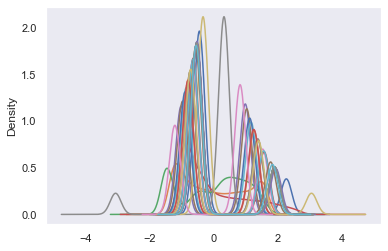

In [67]:
plt.figure(figsize=[15,8])
df_scaled.plot.kde()
plt.legend([],[], frameon=False)

<span style="font-family:serif; font-size:28px;">Machine Learning Model Evaluations and Predictions</span>

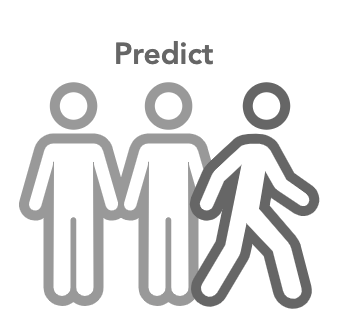

<span style="font-family:serif; font-size:28px;">Decision Tree Classifier</span>

In [79]:
from sklearn.tree import DecisionTreeClassifier
dt_cl = DecisionTreeClassifier(random_state=1,max_depth = 5)
dt_cl.fit(x_train,y_train)
y_pred_dt = dt_cl.predict(x_test)
print(classification_report(y_test,y_pred_dt))
print("Training score: ", dt_cl.score(x_train, y_train))
print("Testing score: ", dt_cl.score(x_test, y_test))

              precision    recall  f1-score   support

           0       0.85      0.86      0.85      1050
           1       0.57      0.54      0.55       357

    accuracy                           0.78      1407
   macro avg       0.71      0.70      0.70      1407
weighted avg       0.77      0.78      0.78      1407

Training score:  0.8044444444444444
Testing score:  0.7789623312011372


<span style="font-family:serif; font-size:28px;">Hyper Parameter Tuning for Decision Tree</span>

In [75]:
param_grid_array = {"criterion" : ["gini", "entropy"],
                    "max_depth" : range(4,10),
                    "max_features" :['auto', 'sqrt', 'log2', None]
                   }

grid_search = GridSearchCV(dt_cl,param_grid = param_grid_array,n_jobs = -1,cv = 5)
grid_search.fit(x,y)
print("Best params :",grid_search.best_params_)
print("Best score :", grid_search.best_score_)

Best params : {'criterion': 'gini', 'max_depth': 5, 'max_features': 'auto'}
Best score : 0.7895320188328829


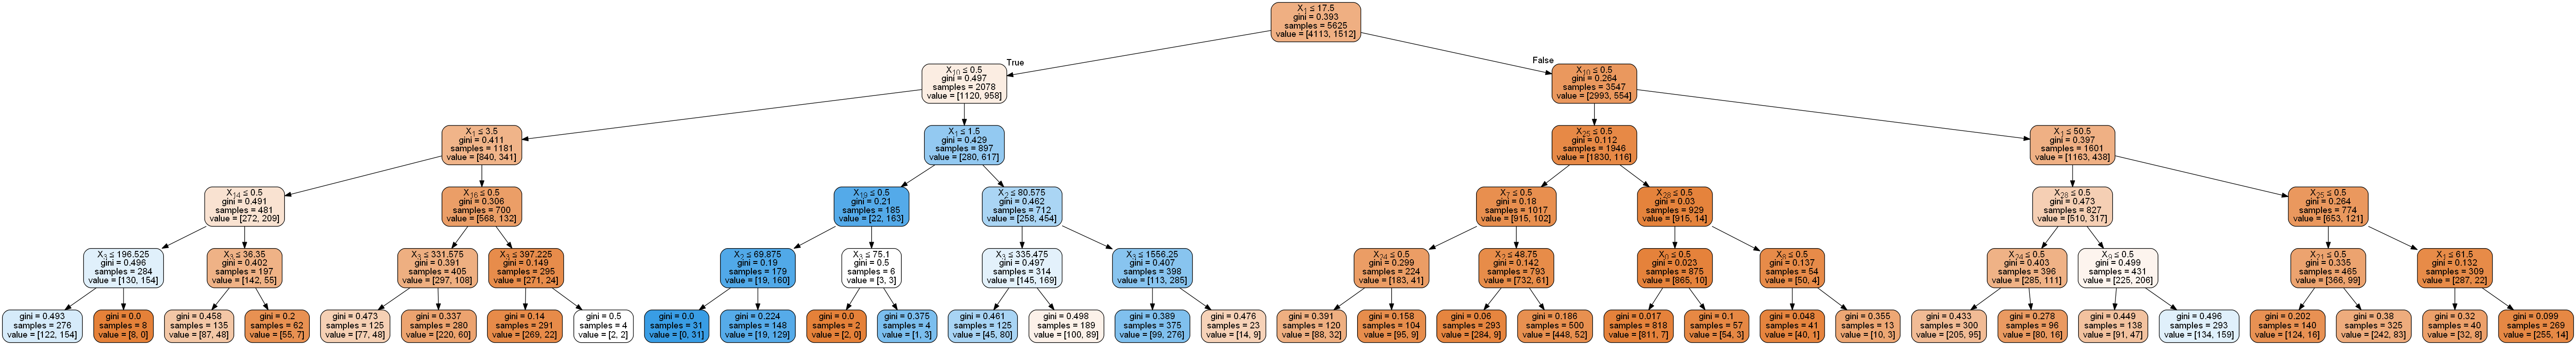

<Figure size 720x576 with 0 Axes>

In [80]:
from io import StringIO
import pydotplus
from PIL import Image
from IPython.display import Image
from six import StringIO
from sklearn.tree import DecisionTreeClassifier, export_graphviz

plt.figure(figsize=(10,8))
dot_data = StringIO()
export_graphviz(dt_cl,out_file=dot_data,
               filled=True,rounded=True,
               special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

In [83]:
model_accuracy = {}
model_accuracy['Decision Tree'] =  grid_search.best_score_

[[905 145]
 [166 191]]


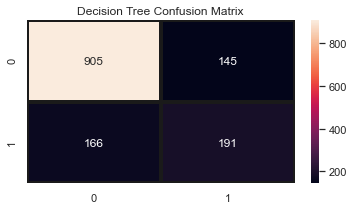

In [89]:
from sklearn.metrics import confusion_matrix
cf_matrix = confusion_matrix(y_true = y_test, y_pred= y_pred_dt)
print(cf_matrix)

plt.figure(figsize=(6,3))
sns.heatmap(cf_matrix,annot=True,fmt = "d",linecolor="k",linewidths=3)
    
plt.title("Decision Tree Confusion Matrix",fontsize=12)
plt.show()

<span style="font-family:serif; font-size:28px;">Random Forest Classifier</span>

In [85]:
from sklearn.ensemble import RandomForestClassifier
cl_rf = RandomForestClassifier(bootstrap= True, criterion= 'entropy', max_depth= 9, max_features= 'sqrt', n_estimators= 200)
cl_rf.fit(x_train,y_train)
y_pred2 = cl_rf.predict(x_test)

print(classification_report(y_test,y_pred2))
print("Training score: ", cl_rf.score(x_train, y_train))
print("Testing score: ", cl_rf.score(x_test, y_test))

              precision    recall  f1-score   support

           0       0.84      0.89      0.87      1050
           1       0.61      0.52      0.56       357

    accuracy                           0.80      1407
   macro avg       0.73      0.70      0.71      1407
weighted avg       0.79      0.80      0.79      1407

Training score:  0.8467555555555556
Testing score:  0.7953091684434968


<span style="font-family:serif; font-size:28px;">Hyper Parameter Tuning for Random Forest</span>

In [84]:
random_state = 42
param_grid_array = {"n_estimators" :[200],
                    "criterion" : ["gini", "entropy"],
                    "max_depth" : range(4,10),
                    "max_features" :['auto', 'sqrt', 'log2', None],
                    "bootstrap": [True, False]
                   }

grid_search = GridSearchCV(cl_rf,param_grid = param_grid_array,n_jobs = -1,cv = 5)
grid_search.fit(x,y)
print(grid_search.best_params_)
print(grid_search.best_score_)
model_accuracy['Random forest'] =  grid_search.best_score_

{'bootstrap': True, 'criterion': 'entropy', 'max_depth': 9, 'max_features': 'sqrt', 'n_estimators': 200}
0.8030412861520482


[[934 116]
 [172 185]]


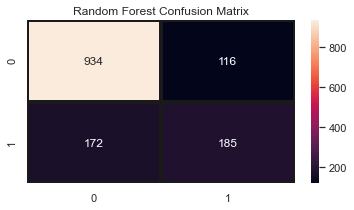

In [111]:
cf_matrix = confusion_matrix(y_true = y_test, y_pred= y_pred2)
print(cf_matrix)

plt.figure(figsize=(6,3))
sns.heatmap(cf_matrix,annot=True,fmt = "d",linecolor="k",linewidths=3)
    
plt.title("Random Forest Confusion Matrix",fontsize=12)
plt.show()

<span style="font-family:serif; font-size:28px;">KNN classifier</span>

In [108]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=20)
knn.fit(x_train,y_train)
ypred_knn = knn.predict(x_test)

print(classification_report(y_test,ypred_knn))
print("Training score: ", knn.score(x_train, y_train))
print("Testing score: ", knn.score(x_test, y_test))
model_accuracy['KNeighborsClassifier'] =  knn.score(x_train, y_train)

              precision    recall  f1-score   support

           0       0.81      0.91      0.86      1050
           1       0.59      0.39      0.47       357

    accuracy                           0.78      1407
   macro avg       0.70      0.65      0.66      1407
weighted avg       0.76      0.78      0.76      1407

Training score:  0.8008888888888889
Testing score:  0.7775408670931059


In [105]:
accuracy_rate = []

for i in range(1,40):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    score=cross_val_score(knn,x,y,cv=10)
    accuracy_rate.append(score.mean())
print(accuracy_rate)

[0.719140170373723, 0.7581030567050304, 0.7521327023794129, 0.7677748771498771, 0.7630827298590457, 0.7764495506271822, 0.772610686344239, 0.7810016730246993, 0.7795793999741367, 0.7828508906633906, 0.7838468252941937, 0.7825659915298073, 0.781285359821544, 0.7817119002974267, 0.7792938946721841, 0.7817125064657959, 0.7837025572222941, 0.7818533395836028, 0.7842703349282297, 0.7824221275701538, 0.7849821786499417, 0.7828496783266521, 0.785408112957455, 0.7825631627440838, 0.7837011428294323, 0.7829903093883356, 0.782990713500582, 0.7804312685891633, 0.7828484659899133, 0.780571899650847, 0.7825629606879607, 0.7814245764903659, 0.782988894995474, 0.7797186166429587, 0.7804302583085477, 0.7798612682658734, 0.7819933644769171, 0.7817100817923187, 0.7824213193456615]


Text(0, 0.5, 'Accuracy Rate')

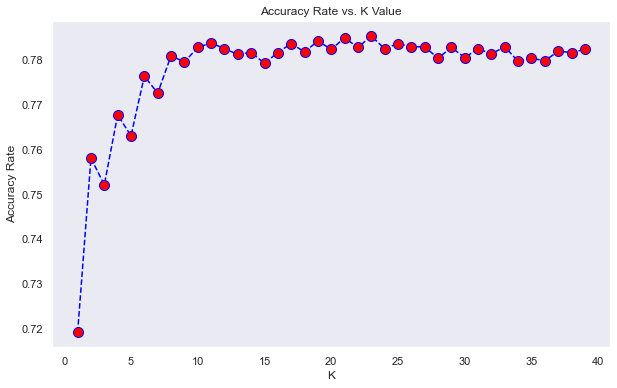

In [104]:

plt.figure(figsize=(10,6))
plt.plot(range(1,40),accuracy_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Accuracy Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Accuracy Rate')

[[956  94]
 [219 138]]


Text(0.5, 1.0, 'KNN Confusion Matrix')

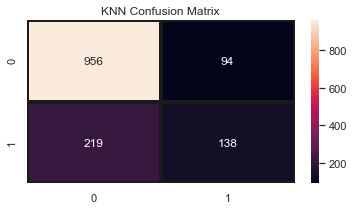

In [112]:
cf_matrix = confusion_matrix(y_true = y_test, y_pred= ypred_knn)
print(cf_matrix)

plt.figure(figsize=(6,3))
sns.heatmap(cf_matrix,annot=True,fmt = "d",linecolor="k",linewidths=3)
    
plt.title("KNN Confusion Matrix",fontsize=12)

*Around k>20 accuracy is almost constant*

In [109]:
Best_accuracy = pd.DataFrame({'Classifier': model_accuracy.keys(),
                            'Accuracy': model_accuracy.values()})
Best_accuracy

Classifier  Accuracy
0         Decision Tree  0.789532
1         Random forest  0.803041
2  KNeighborsClassifier  0.800889

Text(0.5, 1.0, 'Choosing the best model')

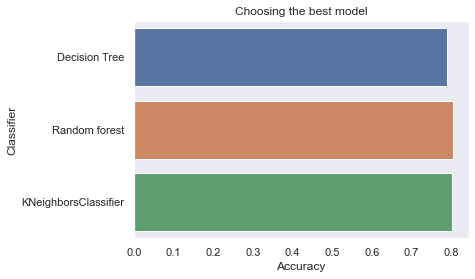

In [110]:
sns.barplot(Best_accuracy.Accuracy, Best_accuracy.Classifier )
plt.title("Choosing the best model")